In [1]:
#This block is for me to run in Google colab
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,"/content/drive/My Drive/Research/Coherent One Shot Hamiltonian Simulation")

!pip install cirq

Mounted at /content/drive
     |████████████████████████████████| 409 kB 14.0 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 328 kB 78.3 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 1.5 MB 70.2 MB/s 
     |████████████████████████████████| 1.3 MB 86.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 220 kB 77.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 10.1 MB 70.9 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 229 kB 75.5 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 15.7 MB 195 kB/s 
    

In [2]:
# Import packages
from qsp_models import *  #Make sure that qsp_models is in your directory
import tensorflow as tf
import numpy as np

# visualization tools
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import scipy
import IPython
from scipy.special import lambertw, erf
from scipy.optimize import fsolve
from keras import backend as K

sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
def mean_deviation(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_mean(deviations)
  return loss


def max_deviation(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_max(deviations)
  return loss


def mean_deviation_squared(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_mean(tf.square(deviations))
  return loss


def max_deviation_squared(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_max(tf.square(deviations))
  return loss

Epoch 1/500
4/4 - 19s - loss: 0.9793
Epoch 2/500
4/4 - 0s - loss: 0.7965
Epoch 3/500
4/4 - 0s - loss: 0.6341
Epoch 4/500
4/4 - 0s - loss: 0.5077
Epoch 5/500
4/4 - 0s - loss: 0.4064
Epoch 6/500
4/4 - 0s - loss: 0.3442
Epoch 7/500
4/4 - 0s - loss: 0.2971
Epoch 8/500
4/4 - 0s - loss: 0.2652
Epoch 9/500
4/4 - 0s - loss: 0.2413
Epoch 10/500
4/4 - 0s - loss: 0.2204
Epoch 11/500
4/4 - 0s - loss: 0.2019
Epoch 12/500
4/4 - 0s - loss: 0.1858
Epoch 13/500
4/4 - 0s - loss: 0.1713
Epoch 14/500
4/4 - 0s - loss: 0.1585
Epoch 15/500
4/4 - 0s - loss: 0.1479
Epoch 16/500
4/4 - 0s - loss: 0.1389
Epoch 17/500
4/4 - 0s - loss: 0.1313
Epoch 18/500
4/4 - 0s - loss: 0.1242
Epoch 19/500
4/4 - 0s - loss: 0.1182
Epoch 20/500
4/4 - 0s - loss: 0.1129
Epoch 21/500
4/4 - 0s - loss: 0.1080
Epoch 22/500
4/4 - 0s - loss: 0.1036
Epoch 23/500
4/4 - 0s - loss: 0.0995
Epoch 24/500
4/4 - 0s - loss: 0.0959
Epoch 25/500
4/4 - 0s - loss: 0.0927
Epoch 26/500
4/4 - 0s - loss: 0.0896
Epoch 27/500
4/4 - 0s - loss: 0.0869
Epoch 28/

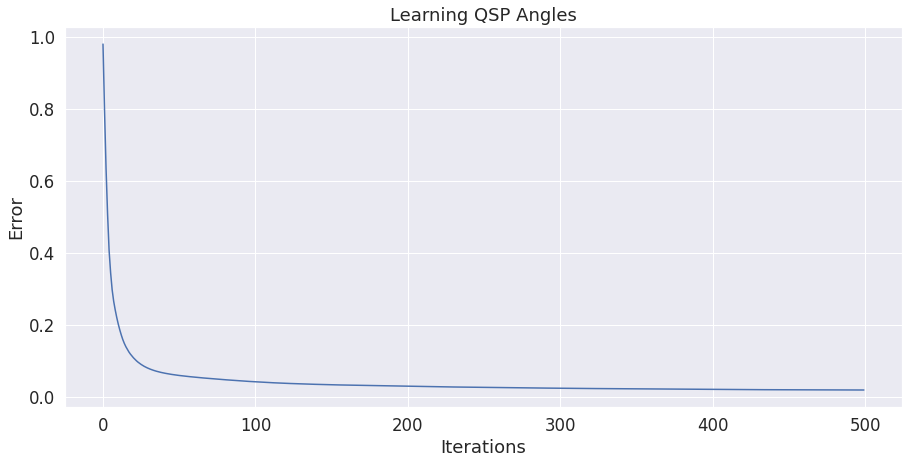

Epoch 1/150
1/1 - 22s - loss: 0.0186
Epoch 2/150
1/1 - 0s - loss: 0.0186
Epoch 3/150
1/1 - 0s - loss: 0.0186
Epoch 4/150
1/1 - 0s - loss: 0.0186
Epoch 5/150
1/1 - 0s - loss: 0.0186
Epoch 6/150
1/1 - 0s - loss: 0.0186
Epoch 7/150
1/1 - 0s - loss: 0.0186
Epoch 8/150
1/1 - 0s - loss: 0.0186
Epoch 9/150
1/1 - 0s - loss: 0.0186
Epoch 10/150
1/1 - 0s - loss: 0.0186
Epoch 11/150
1/1 - 0s - loss: 0.0186
Epoch 12/150
1/1 - 0s - loss: 0.0186
Epoch 13/150
1/1 - 0s - loss: 0.0186
Epoch 14/150
1/1 - 0s - loss: 0.0186
Epoch 15/150
1/1 - 0s - loss: 0.0186
Epoch 16/150
1/1 - 0s - loss: 0.0186
Epoch 17/150
1/1 - 0s - loss: 0.0186
Epoch 18/150
1/1 - 0s - loss: 0.0186
Epoch 19/150
1/1 - 0s - loss: 0.0186
Epoch 20/150
1/1 - 0s - loss: 0.0186
Epoch 21/150
1/1 - 0s - loss: 0.0186
Epoch 22/150
1/1 - 0s - loss: 0.0186
Epoch 23/150
1/1 - 0s - loss: 0.0186
Epoch 24/150
1/1 - 0s - loss: 0.0186
Epoch 25/150
1/1 - 0s - loss: 0.0186
Epoch 26/150
1/1 - 0s - loss: 0.0186
Epoch 27/150
1/1 - 0s - loss: 0.0186
Epoch 28/

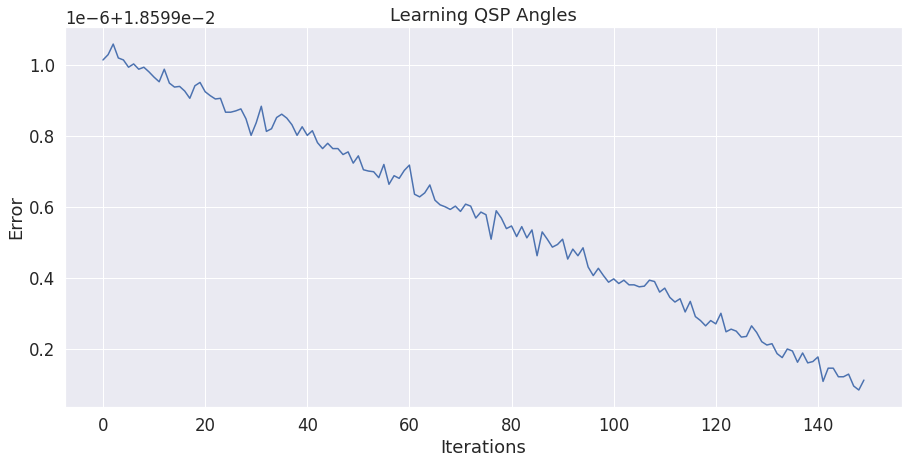

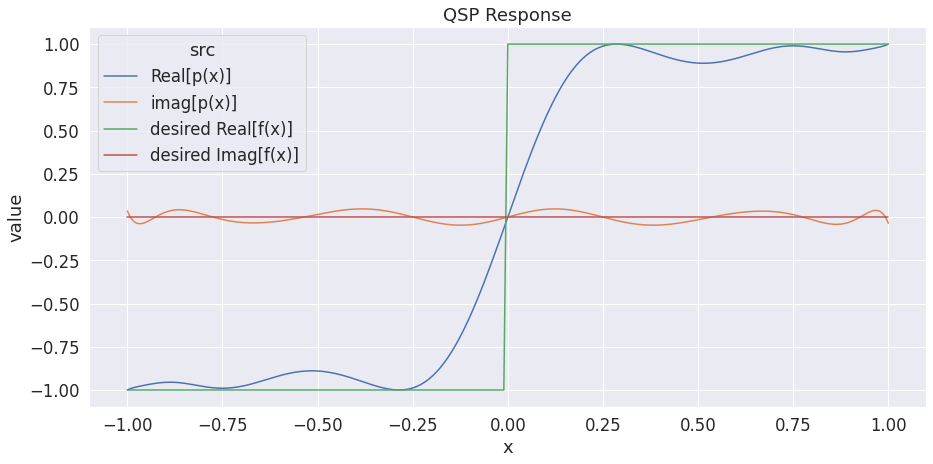

In [19]:
# Delta parameter in the approiamtion to the sign function
Delta = .1

# Polynomial setup
poly_deg = 21   # Make sure to choose an odd degree for sign
f_real = lambda x: np.sign(x)
f_imag = lambda x: 0*x

# QSP convention and learning rate
convention = 0      # 0 = |0><0| convention, 1 = |+><+| convention
learning_rate = 0.004

# Define loss function; the mean squared error works well here
mean_or_max = 0     # 0=mean, 1=max
squared = 1         # 0=|y_pred-y_true|, 1=|y_pred-y_true|^2

# The input theta training values 
th_in = np.concatenate((np.linspace(0, np.arccos(Delta/2), 200), np.linspace(np.arccos(-Delta/2), np.pi, 200)))
th_in = tf.reshape(th_in, (th_in.shape[0], 1))

# We desire p(x) to be f(x)
expected_outputs = (f_real(np.cos(th_in))[:,0] +1j*f_imag(np.cos(th_in))[:,0]).astype('complex64')

# Train the model
model = construct_qsp_model(poly_deg, convention, learning_rate, mean_or_max, squared)
history = model.fit(x=th_in, y=expected_outputs, batch_size=100, epochs=500, verbose=2)
plot_loss(history)


# Additional training steps at smaller learning rate
K.set_value(model.optimizer.learning_rate, 0.0005)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
K.set_value(model.optimizer.learning_rate, 0.00001)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
plot_loss(history)
plot_qsp_response(f_real, f_imag, model, convention)


In [22]:
# Calculate error
th_in2 =  np.concatenate((np.linspace(0, np.arccos(Delta/2), int(1e4)), np.linspace(np.arccos(-Delta/2), np.pi, int(1e4))))
th_in2 = tf.reshape(th_in2, (th_in2.shape[0], 1))
expected_outputs2 = (f_real(np.cos(th_in2))[:,0] +1j*f_imag(np.cos(th_in2))[:,0]).astype('complex64')

error = max_deviation(model(th_in2), expected_outputs2).numpy()
print(str(error))

0.69417477


In [23]:
# Output QSP phases
phis = model.trainable_weights[0].numpy()
for phi in phis:
  print(phi[0])

2.8617551
2.8743155
2.0661862
0.38881508
2.6534903
0.73813874
1.1371254
2.5689921
0.5106167
0.6575774
2.4494781
1.6318843
2.0144484
0.7705131
1.0723227
2.255137
2.534313
0.8357467
1.4044728
3.5426285
2.1436963
0.5517159
